In [11]:
%matplotlib inline

import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
import pandas

from sklearn import svm
from sklearn import datasets
from sklearn import preprocessing

from sklearn import model_selection # <---- PARTICIONADO

from sklearn import metrics
from sklearn.metrics import confusion_matrix

La función a continuación levanta todos los datos en la carpeta indicada (ej. "clases/") y los almacena en un diccionario, donde las claves corresponden a la clase en cuestión.

In [12]:
def read_csv_files(folder, Nfeatures=102):
    '''
    Load all the "CSV" files in a folder, and store each one in a dictionary.
    '''
    
    #filenames = glob.glob(rel_path + '*.csv')
    
    clase = dict()
    
    for n in range(0,24):
        
      clase[n] = pandas.read_csv(folder +'clase' + str(n) + '.csv', sep=',',header=None, names=['f'+str(m) for m in range(0,Nfeatures)])
#        clase[n+1] = np.array(pandas.read_csv(folder +'clase' + str(n+1) + '.csv', sep=',',header=None, names=['f'+str(m) for m in range(0,Nfeatures)]))
    return clase

Levanto los datos de los cromosomas almacenados en la carpeta "clases/"

In [13]:
clase = read_csv_files('clases/')

print(clase[0])


print(clase[1].shape)
print(clase[2].shape)

        f0   f1     f2     f3     f4     f5     f6     f7     f8     f9  \
0     1954  148  254.0  232.0  224.0  187.0  175.0  167.0  165.0  167.0   
1     1621  134  202.0  191.0  179.0  169.0  144.0  132.0  123.0  120.0   
2     1841  115  233.0  213.0  196.0  177.0  164.0  149.0  141.0  138.0   
3     1784  106  197.0  201.0  180.0  173.0  164.0  157.0  152.0  150.0   
4     2663  155  235.0  223.0  213.0  197.0  184.0  167.0  157.0  167.0   
5     1640  148  233.0  224.0  215.0  205.0  176.0  163.0  164.0  169.0   
6     1470  140  241.0  212.0  204.0  187.0  162.0  151.0  155.0  156.0   
7     2430  150  207.0  207.0  179.0  156.0  153.0  151.0  157.0  160.0   
8     1935  115  217.0  192.0  177.0  171.0  166.0  165.0  164.0  167.0   
9     1318  115  205.0  196.0  177.0  164.0  161.0  156.0  156.0  159.0   
10    1775  118  242.0  225.0  217.0  204.0  196.0  186.0  184.0  180.0   
11    1348  114  202.0  176.0  166.0  163.0  160.0  156.0  153.0  158.0   
12    1305  109  206.0  2

Genero el dataset que usaré para los experimentos. Para este ejemplo, voy a usar los cromosomas de la clase 1 y 2 solamente. Se podría extender para usar más cromosomas.

In [14]:
clases_a_usar = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

X = []
Y = []

for idx in clases_a_usar:
    
    x = np.array(clase[idx]).tolist()
    y = idx * np.ones((clase[idx].shape[0]))
    y = y.tolist()
    
    X.extend(x)
    Y.extend(y)

#print(X[0])
#print(X[-1])
#print(Y[0])
#print(Y[-1])

**NOTA**: Es má fácil manipular listas de número en lugar de arreglos numpy. Scikit-learn acepta tanto arreglos de numpy como listas de python.

<h2>Particionado de los datos</h2>

In [15]:
# TRAIN: 80% -- TEST: 20%
#X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X,Y,test_size=0.4,random_state=0)

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.2,random_state=0)

# Ahora si convierto a NUMPY
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)


print('-----------')
print('TRAIN DATA')
#print(X_train)
print(Y_train)

print('-----------')
print('TEST DATA')
#print (X_test)
print (Y_test)

-----------
TRAIN DATA
[ 20.  13.   3. ...,   8.   9.   2.]
-----------
TEST DATA
[ 20.  20.  13. ...,   0.  13.  15.]


<h1>Preprocesamiento</h1>

<h2>Estandarización</h2>

(array([  1.65300000e+03,   6.57900000e+03,   6.66100000e+03,
          3.67000000e+03,   1.65100000e+03,   5.98000000e+02,
          8.10000000e+01,   3.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([-2.09433569, -1.23663995, -0.37894421,  0.47875152,  1.33644726,
         2.19414299,  3.05183873,  3.90953446,  4.7672302 ,  5.62492594,
         6.48262167]),
 <a list of 10 Patch objects>)

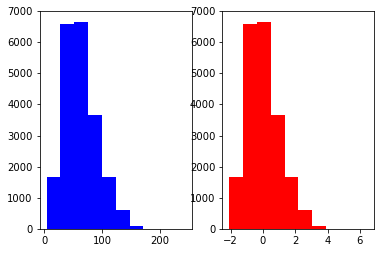

In [16]:
scaler = preprocessing.StandardScaler().fit(X_train)                    # Built scaler to normalize values (mean=0.0 and std=1.0)
#scaler = preprocessing.MinMaxScaler(feature_range=(0,1)).fit(X_train)  # Built scaler to scale values in range [Xmin,Xmax]
#scaler = preprocessing.MaxAbsScaler().fit(X_train)                     # Built scaler to scale values in range [-1,1]

# APPLY TRAINED SCALER
sX_train = scaler.transform(X_train)

sX_test = scaler.transform(X_test)

sX_train.mean(axis=0)
#sX_train.std(axis=0)

plt.subplot(1,2,1)
plt.hist(np.array(X_train)[:,1],color='b')

plt.subplot(1,2,2)
plt.hist(np.array(sX_train)[:,1],color='r')

<h2>Normalización de los datos</h2>

Revisar: *http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing*

(array([  1.65300000e+03,   6.57900000e+03,   6.88700000e+03,
          3.44400000e+03,   1.69800000e+03,   5.51000000e+02,
          8.10000000e+01,   3.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([ 0.00040351,  0.00282459,  0.00524566,  0.00766674,  0.01008781,
         0.01250889,  0.01492997,  0.01735104,  0.01977212,  0.02219319,
         0.02461427]),
 <a list of 10 Patch objects>)

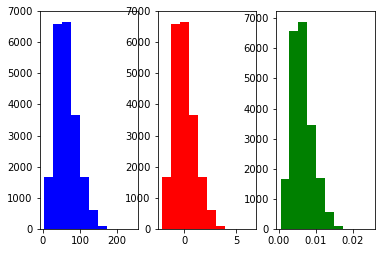

In [17]:
# Previamente estandarizado (cada patrón tiene media=0 y varianza=1)
normalizer = preprocessing.Normalizer(norm='l2', copy=True).fit(X_train.T)

nX_train = normalizer.transform(X_train.T)
nX_test = normalizer.transform(X_test.T)

# Traspongo nuevamente
nX_train = nX_train.T
nX_test = nX_test.T


plt.subplot(1,3,1)
plt.hist(np.array(X_train)[:,1],color='b')

plt.subplot(1,3,2)
plt.hist(np.array(sX_train)[:,1],color='r')

plt.subplot(1,3,3)
plt.hist(np.array(nX_train)[:,1],color='g')

<h2>Construcción del clasificador</h2>

In [18]:
clf = svm.SVC(kernel='linear', gamma='auto', C=1, cache_size=500)
#clf = svm.SVC(kernel='rbf', gamma=0.1, C=1000, cache_size=500)

<h2>Entrenamiento del clasificador</h2>

In [19]:
#TRAIN = X_train  # --> Datos CRUDOS
TRAIN = sX_train # --> Datos ESTANDARIZADOS
#TRAIN = nX_train # --> Datos NORMALIZADOS

clf.fit(TRAIN, Y_train)

SVC(C=1, cache_size=500, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<h2>Predicción y medidas de desempeño</h2>

In [ ]:
#TEST = X_test  # --> Datos CRUDOS
TEST = sX_test # --> Datos ESTANDARIZADOS
#TEST = nX_test # --> Datos NORMALIZADOS

#======================
# SCORE CALCULATION
#======================
score = clf.score(TEST, Y_test)

print("\nAccuracy: %0.2f" % (score))



#===================
# CONFUSSION MATRIX
#===================
Y_pred = clf.predict(TEST)

print('\nCONFUSSION MATRIX')
cm=metrics.confusion_matrix(Y_test,Y_pred)
print(cm)

#MATRIZ DE CONFUSION

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')





#=========
# REPORT
#=========
print("\n\nClassification report for classifier %s:\n\n%s\n"
      %
      (clf, metrics.classification_report(Y_test, Y_pred)))


Accuracy: 0.87

CONFUSSION MATRIX
[[214   3   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  3 221   2   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   0]
 [  1   1 204   0   1   9   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  1   3   4 181   9   3   1   0   1   1   0   0   0   0   0   0   0   0
    0   0   0   0   2   0]
 [  0   1   5  24 204   2   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   1   0]
 [  2   2   3   2   0 203   3   2   2   3   0   0   0   0   0   0   0   0
    0   1   0   0   1   0]
 [  2   1   1   0   1   2 208   3   4   1   0   3   1   0   0   1   0   0
    0   0   0   0   2   0]
 [  0   1   2   0   0   0   0 208   7   0   2   0   1   4   0   1   0   0
    0   0   0   0   3   0]
 [  0   1   1   0   0   0   4   5 181   3   0   1   1   1   0   2   1   0
    1   0   0   0   7   0]
 [  0   0   0   1   1   1   0   4   3 195   3   0   2   

/home/asusn56/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Es interesante ver que en la diagonal de la matriz de confusión están los valores más altos (se confunde relativamente poco el clasificador).